This notebook contains three main sections:

* Introduction: This section covers the domain specific area and the
problem, the objectives of this project and the evaluation metrics decided
upon when evaluating the results.
* Implementation: This section covers the data pre-processing steps,
baseline performance, vectorization optimisation and classification approach.
* Conclusions: This sections evaluates the classifier results and
alternative approaches

TripAdvisor Hotel Review Dataset is shared under Creative Commons
Attribution Non Commercial 4.0 International License. Under this license,
the project can use the data as long as credit is given
2 Dataset
The dataset I have extracted for this was taken from the Kaggle website. It is the TripAdvisor hotel reviews dataset from Kaggle. This dataset was originally taken from the publication “Alam, M. H., Ryu, W.-J., Lee, S., 2016. Joint multi-grain topic sentiment: modeling semantic aspects for online reviews. Information Sciences 339, 206–223”. Trip Advisor Hotel Reviews
The dataset consists of 20,490 hotel reviews that were scraped from the TripAdvisor website and is in CSV format. It consists of two fields:
Review field which has the long form text review that was written about the hotel (as a string data type).
Rating field (as an integer data type). This is the number of stars (1-5) that the reviewer gave the hotel overall. There are no null values in the extracted dataset. The reviews are all written in English

#### Citation References

Alam, M. H., Ryu, W.-J., Lee, S., 2016. Joint multi-grain topic sentiment: modeling semantic aspects for online reviews. Information Sciences 339, 206–223.

In [2]:
import numpy as np
import pandas as pd
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import word_tokenize
from nltk import sent_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

import re

In [3]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


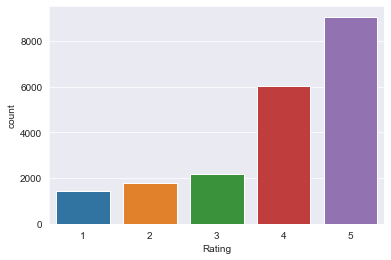

Distribution of Ratings: 

5    44.19%
4    29.47%
3    10.66%
2     8.75%
1     6.93%
Name: Rating, dtype: object


In [4]:
sns.countplot(df, x='Rating',)
plt.show()
print("Distribution of Ratings: \n")
print(df.Rating.value_counts(normalize=True).mul(100).round(2).astype(str)
      + '%')

In [5]:
sentiment_mapping = {
    1:'Negative', 2:'Negative', 3:'Negative',
    4:'Positive', 5:'Positive'
}
df['Sentiment'] = df['Rating'].map(sentiment_mapping)
df['Binary_Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})
df.head()

,Review,Rating,Sentiment,Binary_Sentiment
0,nice hotel expensive parking got good deal sta...,4,Positive,1
1,ok nothing special charge diamond member hilto...,2,Negative,0
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,0
3,"unique, great stay, wonderful time hotel monac...",5,Positive,1
4,"great stay great stay, went seahawk game aweso...",5,Positive,1


In [6]:
df['Sentiment'].value_counts()

Positive    15093
Negative     5398
Name: Sentiment, dtype: int64

In [7]:
df['Sentiment'].value_counts(normalize=True).mul(100).round(2).astype(str) \
+ '%'

Positive    73.66%
Negative    26.34%
Name: Sentiment, dtype: object

In [8]:
wnl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def text_preprocess(text):
    """Tokenize and lemmatize text"""
    # Need to add in stopwords. Explore spacy option as well
    text = text.lower() #lowercase text
    words = re.sub('[^a-zA-Z]', ' ', text) #replace character
    tokens = word_tokenize(words)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [wnl.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if len(token) > 2]
    keep_words = [token for token in tokens if token not in stop_words]
    return " ".join(keep_words)
df['tokenized_sents'] = df.apply(lambda row: word_tokenize
(row['Review']), axis=1)

df['processed'] = df.Review.apply(text_preprocess)
df.head()

,Review,Rating,Sentiment,Binary_Sentiment,tokenized_sents,processed
0,nice hotel expensive parking got good deal sta...,4,Positive,1,"[nice, hotel, expensive, parking, got, good, d...",nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,Negative,0,"[ok, nothing, special, charge, diamond, member...",nothing special charge diamond member hilton d...
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,0,"[nice, rooms, not, 4, *, experience, hotel, mo...",nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5,Positive,1,"[unique, ,, great, stay, ,, wonderful, time, h...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,Positive,1,"[great, stay, great, stay, ,, went, seahawk, g...",great stay great stay went seahawk game awesom...
